In [1]:
import sys
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from lib.data import load_extracted_samples

In [7]:
df = pd.json_normalize(load_extracted_samples())
df["has_text"] = df["text"].apply(lambda x: len(x) > 0)
df

,filename,size,pages,text,images,has_text
0,102819958.pdf,54567,2,Invoice num.: 102819958\nInvoice issued: Oct 9...,[],True
1,105002622.pdf,46078,2,"Inv.: 105002622\n: Nov 4, 2022\nCollins, Orteg...",[],True
2,10726698.pdf,1879573,2,,[/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extr...,False
3,108017661.pdf,1957491,2,,[/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extr...,False
4,108558649.pdf,204688,2,,[/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extr...,False
...,...,...,...,...,...,...
102,2021-01-20_1816.pdf,52829,2,"Inv.: 435414097\nDue Date: Jan 20, 2021\nMejia...",[/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extr...,True
103,2021-01-20_3014.pdf,47179,2,"Invoice #: 679053956\nRecord date: Jan 20, 202...",[],True
104,2021-01-20_689.pdf,1938905,2,,[/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extr...,False
105,2021-01-21_1021.pdf,47661,2,"Record date: Jan 21, 2021\n: D44139084\nAdams-...",[],True


<Axes: xlabel='size', ylabel='Count'>

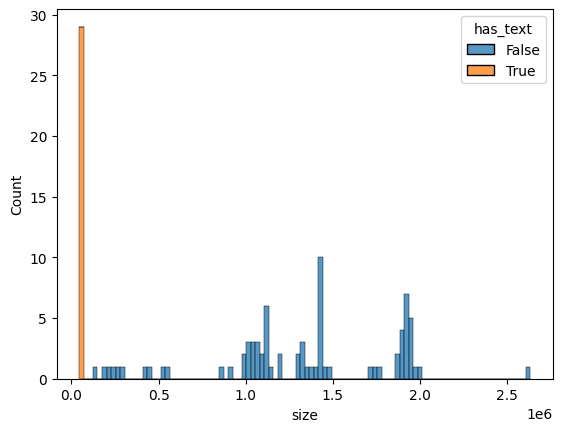

In [8]:
sns.histplot(df, x="size", hue="has_text", multiple="stack", bins=100)

<Axes: >

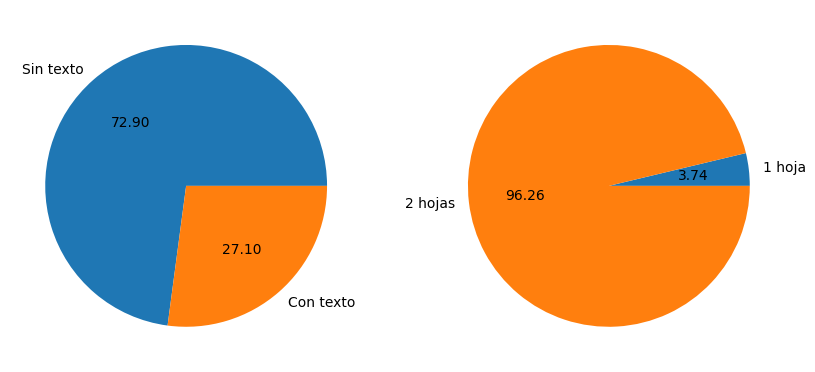

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

df.groupby("has_text").size().plot.pie(ax=ax[0], autopct="%.2f", labels=["Sin texto", "Con texto"])
df.groupby("pages").size().plot.pie(ax=ax[1], autopct="%.2f", labels=["1 hoja", "2 hojas"])

In [11]:
# row of lowest size without text
print(df[(df["has_text"] == False) & (df["pages"] == 1)].sort_values(by="size").iloc[0])

filename                                  2021-01-21_2161.pdf
size                                                   133617
pages                                                       1
text                                                         
images      [/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extr...
has_text                                                False
Name: 106, dtype: object
